In [1]:
# Defining Dependencies

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
from textblob import TextBlob



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Printing the stop words in english
stop_words = set(stopwords.words('english'))
print(stop_words)

{'because', 'there', 'same', 'through', 'o', "should've", 'wouldn', 'i', 'hasn', "weren't", "shouldn't", "hasn't", "it's", 'other', 'how', 'all', 'do', 'own', 'theirs', 'nor', 'are', 'was', 'won', 'yours', 't', 'did', "didn't", 'weren', 'just', 'which', 'by', 'then', 'he', 'him', 'with', 'on', 'll', 'been', 'does', "doesn't", 'here', 'isn', 'it', 'against', 'her', 'needn', 'its', "couldn't", 'what', 'under', 'himself', 'ain', "wasn't", 'about', "you'd", 'while', 'myself', 'above', 'they', 'themselves', 'those', 'each', 'doesn', 'am', 'these', 'didn', 'has', 'our', 'ours', "you're", 'over', 'too', 've', 'you', 'who', 'more', 'will', "haven't", 'but', 'your', 'below', 'being', 'to', 'where', 'few', 'd', 'ourselves', "mightn't", 'or', 'we', 'itself', 'from', 'mightn', 'herself', 'any', 'most', 'again', "don't", 'don', 'a', 'were', 'an', 'the', 're', 'wasn', "aren't", "you'll", 'this', 's', 'for', 'after', 'my', 'as', 'before', 'should', 'out', 'y', 'his', 'once', 'them', 'm', 'ma', 'only'

In [3]:
# Data processing 
# Loading Data from csv file to pandas dataframe
twitter_data = pd.read_csv('vaccination_tweets.csv')

In [4]:
# Checking the dataframe
twitter_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
twitter_data.tail()   # optional 

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False
11019,1460208097956225028,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-15 11:28:34,"The number of Covid-19 cases today, 15 Novembe...",NaN,Twitter Web App,2,6,False


In [6]:
twitter_data.info()  # information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [7]:
# Checking for Missing Values i.e text in the dataframe 
twitter_data.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [8]:
twitter_data.columns  # viewing columns in the dataframe

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [9]:
# Dropping unrelated columns
tweet_data = twitter_data.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis = 1)

In [10]:
# Checking the dataframe after dropping columns
tweet_data.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [11]:
tweet_data.info() # Reviewing the dataframe after dropping columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [12]:
# Data Processing
def dataprocessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
tweet_data.text = tweet_data['text'].apply(dataprocessing)

In [14]:
tweet_data = tweet_data.drop_duplicates('text')

In [15]:
# Lamentizing the text in the dataframe
lem = WordNetLemmatizer()
def lament(content):
    text = [lem.lemmatize(word) for word in content]
    return content

In [16]:
tweet_data['text'] = tweet_data['text'].apply(lambda x: lament(x))

In [17]:
# Analysing the polarity of tweets
def polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [18]:
tweet_data['polarity'] = tweet_data['text'].apply(polarity)

In [19]:
tweet_data.head(10)   # Reviewing the dataframe 

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [20]:
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    else:
        return "Positive"

In [21]:
tweet_data['sentiment'] = tweet_data['polarity'].apply(sentiment)

<Axes: xlabel='sentiment', ylabel='count'>

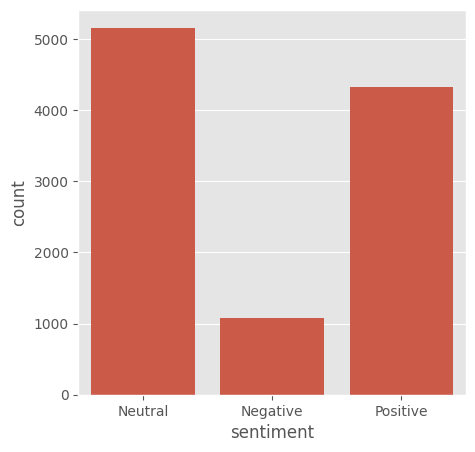

In [22]:
# Plotting the Data
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data = tweet_data)

In [23]:
# Vectorinzing the Dataframe 
vector = CountVectorizer(ngram_range=(1,2)).fit(tweet_data['text'])

In [24]:
# Splitting the dataframe
X = tweet_data['text']
Y = tweet_data['sentiment']
X = vector.transform(X)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [26]:
print("Size of xtrain :",(xtrain.shape))
print("Size of ytrain :",(ytrain.shape))
print("Size of xtest :",(xtest.shape))
print("Size of ytest :",(ytest.shape))

Size of xtrain : (8434, 78583)
Size of ytrain : (8434,)
Size of xtest : (2109, 78583)
Size of ytest : (2109,)


In [27]:
# ignoring certain useless warnings
warnings.filterwarnings('ignore')

In [28]:
# Training the Model 
model = LogisticRegression()
model.fit(xtrain,ytrain)
# Predicting 
model_pred = model.predict(xtest)
# Accuracy Test
model_accuracy = accuracy_score(model_pred,ytest)
print("Test Accuracy : {:.2f}%".format(model_accuracy*100))

Test Accuracy : 84.64%


[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Neutral       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



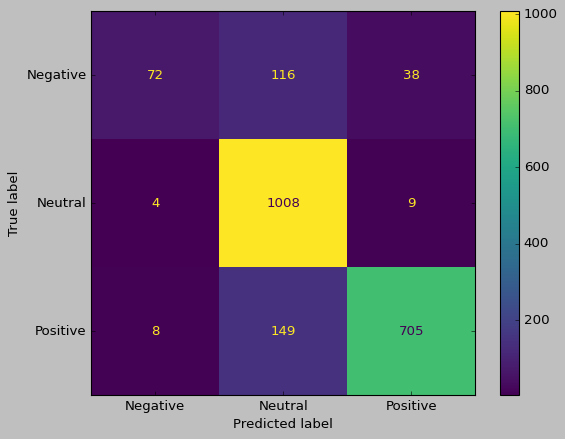

In [29]:
# Displaying and plotting the Confusion Matrix
print(confusion_matrix(ytest,model_pred))
print("\n")
print(classification_report(ytest,model_pred)) # display classification report
style.use('classic')
cm=confusion_matrix(ytest,model_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=model.classes_)
disp.plot()

In [30]:
# Hyper-parametering
p_grid = {'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(),p_grid)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [31]:
print('Best Parameters:',grid.best_params_) #printing the parameters

Best Parameters: {'C': 10}


In [32]:
# Predicting after hyper-parametering
ypred = grid.predict(xtest)

In [33]:
# Accuracy after hyper-parametering
model_accuracy = accuracy_score(ypred,ytest) 
print("Test Accuracy : {:.2f}%".format(model_accuracy*100))

Test Accuracy : 85.92%


[[  84  104   38]
 [   4 1008    9]
 [  10  132  720]]


              precision    recall  f1-score   support

    Negative       0.86      0.37      0.52       226
     Neutral       0.81      0.99      0.89      1021
    Positive       0.94      0.84      0.88       862

    accuracy                           0.86      2109
   macro avg       0.87      0.73      0.76      2109
weighted avg       0.87      0.86      0.85      2109



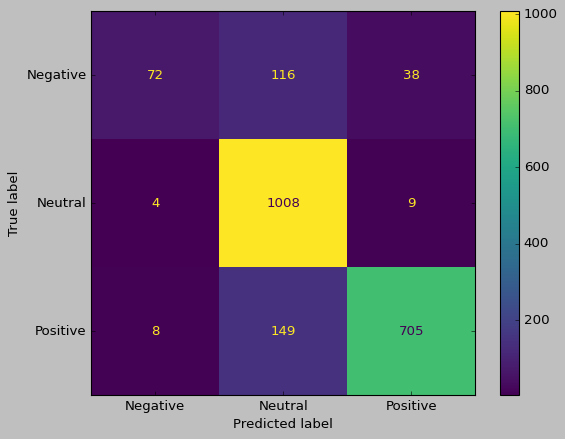

In [34]:
# Displaying and plotting the Confusion Matrix
print(confusion_matrix(ytest,ypred))
print("\n")
print(classification_report(ytest,ypred)) # Display Classification Report
style.use('classic')
cm=confusion_matrix(ytest,model_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=model.classes_)
disp.plot()

In [35]:
# Saving the model for further use
import pickle

In [36]:
filename = 'tweet_model.sav'
pickle.dump(model,open(filename,'wb'))